In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mutual_info_score


In [108]:
df_telco = pd.read_csv('telco_churn.csv')
df_telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [109]:
for column in df_telco.columns:
    print(f'Column:{column} - Unique Values: {df_telco[column].unique()}')

Column:customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column:gender - Unique Values: ['Female' 'Male']
Column:SeniorCitizen - Unique Values: [0 1]
Column:Partner - Unique Values: ['Yes' 'No']
Column:Dependents - Unique Values: ['No' 'Yes']
Column:tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column:PhoneService - Unique Values: ['No' 'Yes']
Column:MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column:InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column:OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column:OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column:DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column:TechSupport - Unique Va

In [110]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [111]:
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'], errors='coerce')

In [112]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [113]:
df_telco[df_telco['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [114]:
df_telco.dropna(inplace=True)

In [115]:
df_telco.drop(columns='customerID', inplace=True)

In [116]:
df_telco.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [117]:
df_telco['PaymentMethod'] = df_telco['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [118]:
df_telco.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

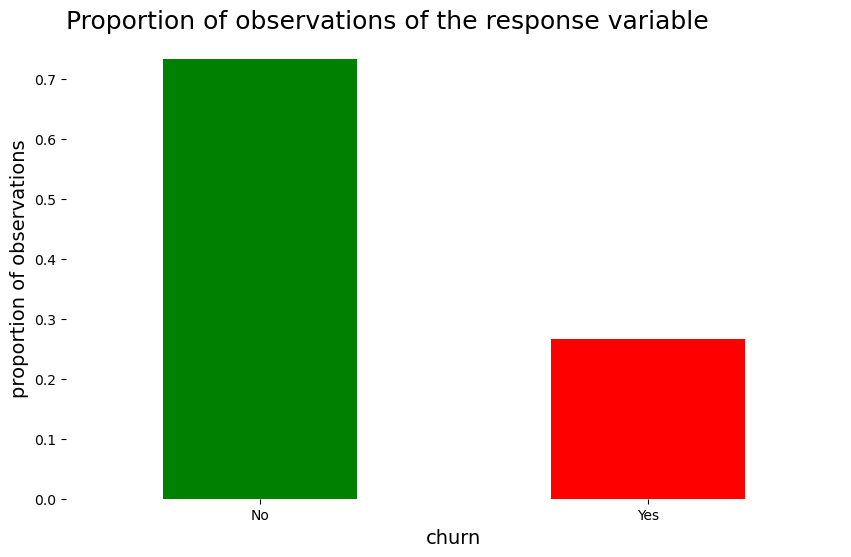

In [119]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

prop_response = df_telco['Churn'].value_counts(normalize=True)

prop_response.plot(kind='bar', ax=ax, color=['green','red'])

ax.set_title('Proportion of observations of the response variable', fontsize=18, loc='left')
ax.set_xlabel('churn', fontsize=14)
ax.set_ylabel('proportion of observations', fontsize=14)
ax.tick_params(rotation='auto')

spine_names = ['top','bottom', 'left','right']
for spine in spine_names:
    ax.spines[spine].set_visible(False)

In [120]:
def percentage_stacked_plot(columns_to_plot, super_title):
    no_of_col = 2
    no_of_rows = math.ceil(len(columns_to_plot)/2)

    fig = plt.figure(figsize=(12, 5*no_of_rows))
    fig.suptitle(super_title, fontsize=22,y=0.95)

    for index, column in enumerate(columns_to_plot,1):
        ax =  fig.add_subplot(no_of_rows, no_of_col, index)

        prop_by_independent = pd.crosstab(df_telco[column], df_telco['Churn']).apply(lambda x: x/x.sum()*100, axis=1)    

        prop_by_independent.plot(kind='bar',ax=ax, stacked=True, rot=0, color=['green','red'])

        ax.legend(loc='upper right', bbox_to_anchor=(0.62,0.5,0.5,0.5), title='Churn', fancybox=True)

        ax.set_title('Proportion of observations by' + column, fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        spine_names = ('top','right','bottom','left')
        for spine in spine_names:
            ax.spines[spine].set_visible(False)


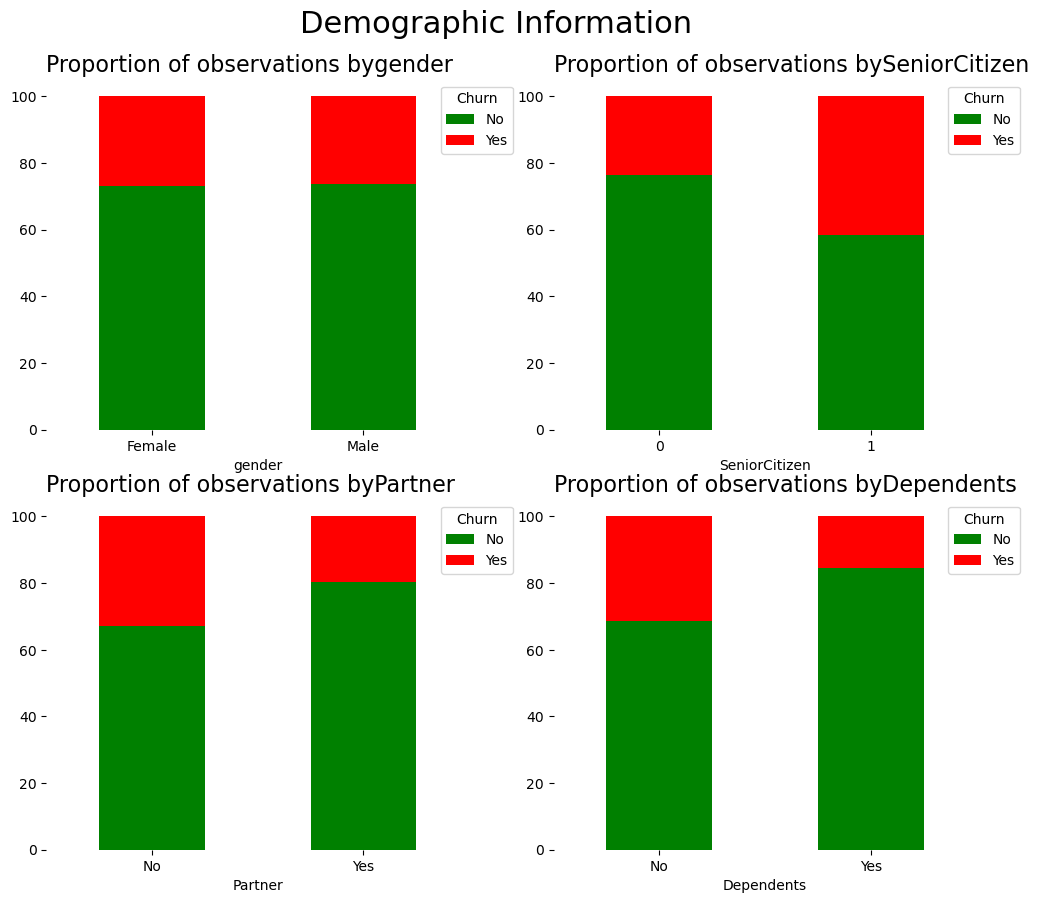

In [121]:
demographic_columns = ['gender','SeniorCitizen','Partner','Dependents']

percentage_stacked_plot(demographic_columns,'Demographic Information')

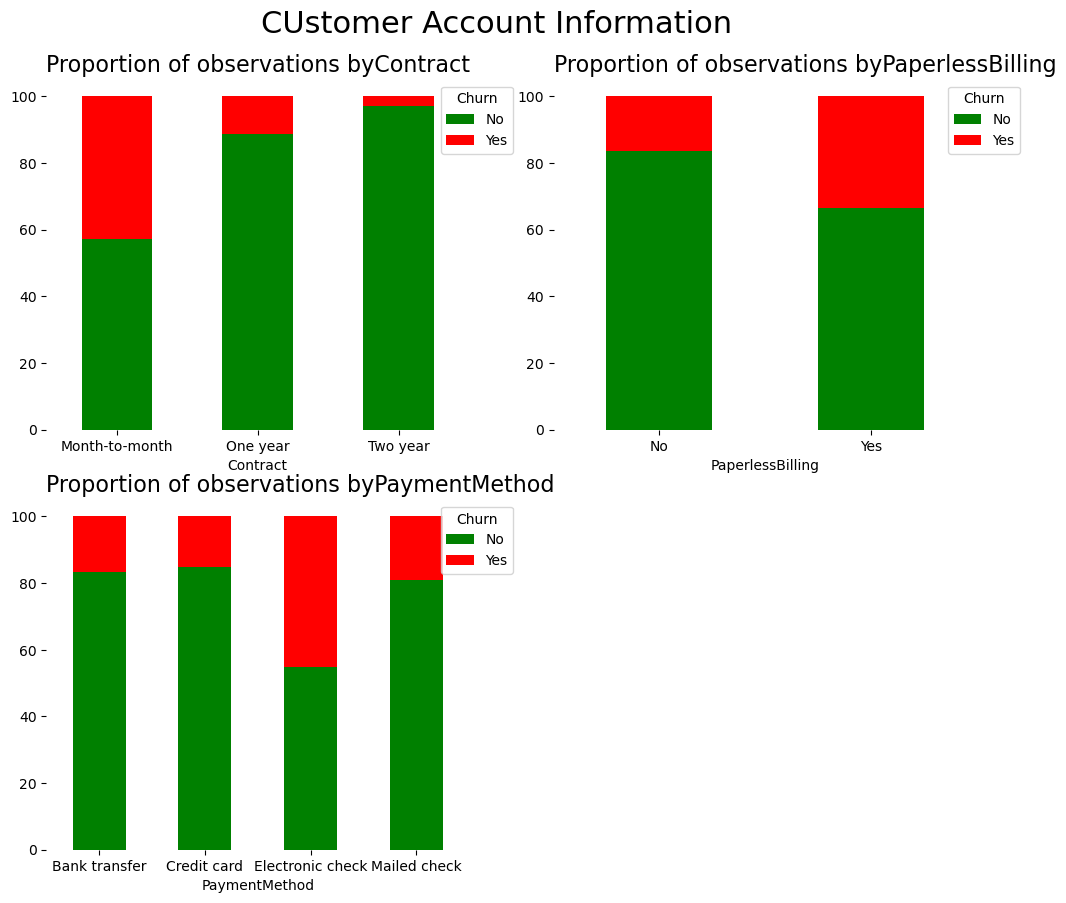

In [122]:
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

percentage_stacked_plot(account_columns,'CUstomer Account Information')

In [123]:
def histogram_plots(columns_to_plot, super_title):

    no_of_col=2
    no_of_rows=math.ceil(len(columns_to_plot)/2)

    fig = plt.figure(figsize=(12, 5 * no_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    for index, column in enumerate(columns_to_plot, 1):

        ax = fig.add_subplot(no_of_rows, no_of_col, index)

        df_telco[df_telco['Churn']=='No'][column].plot(kind='hist',ax=ax, density=True, alpha=0.5,color='green',label='No')
        df_telco[df_telco['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True,alpha=0.5, color='red', label='Yes')

        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),title='Churn', fancybox=True)
        ax.set_title('Distribution of ' + column + ' by churn',fontsize=16, loc='left')
        ax.tick_params(rotation='auto')

        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)


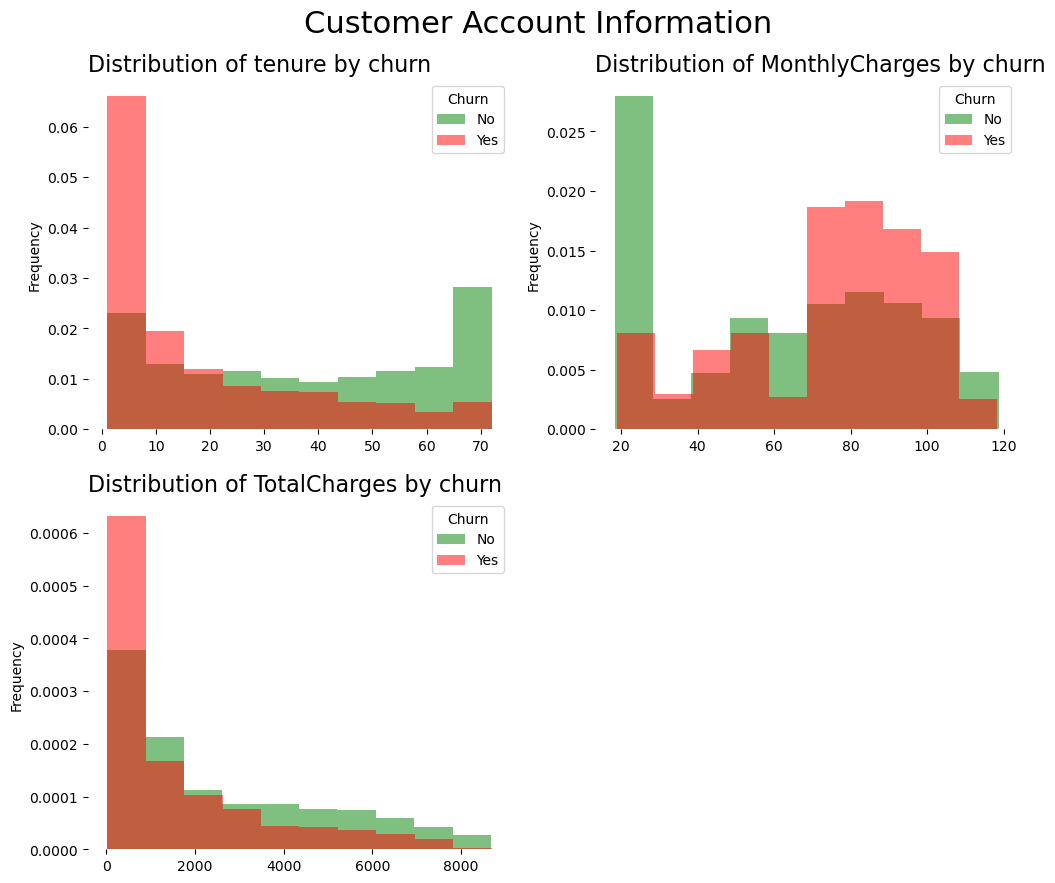

In [124]:
account_columns_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']
histogram_plots(account_columns_numeric, 'Customer Account Information')

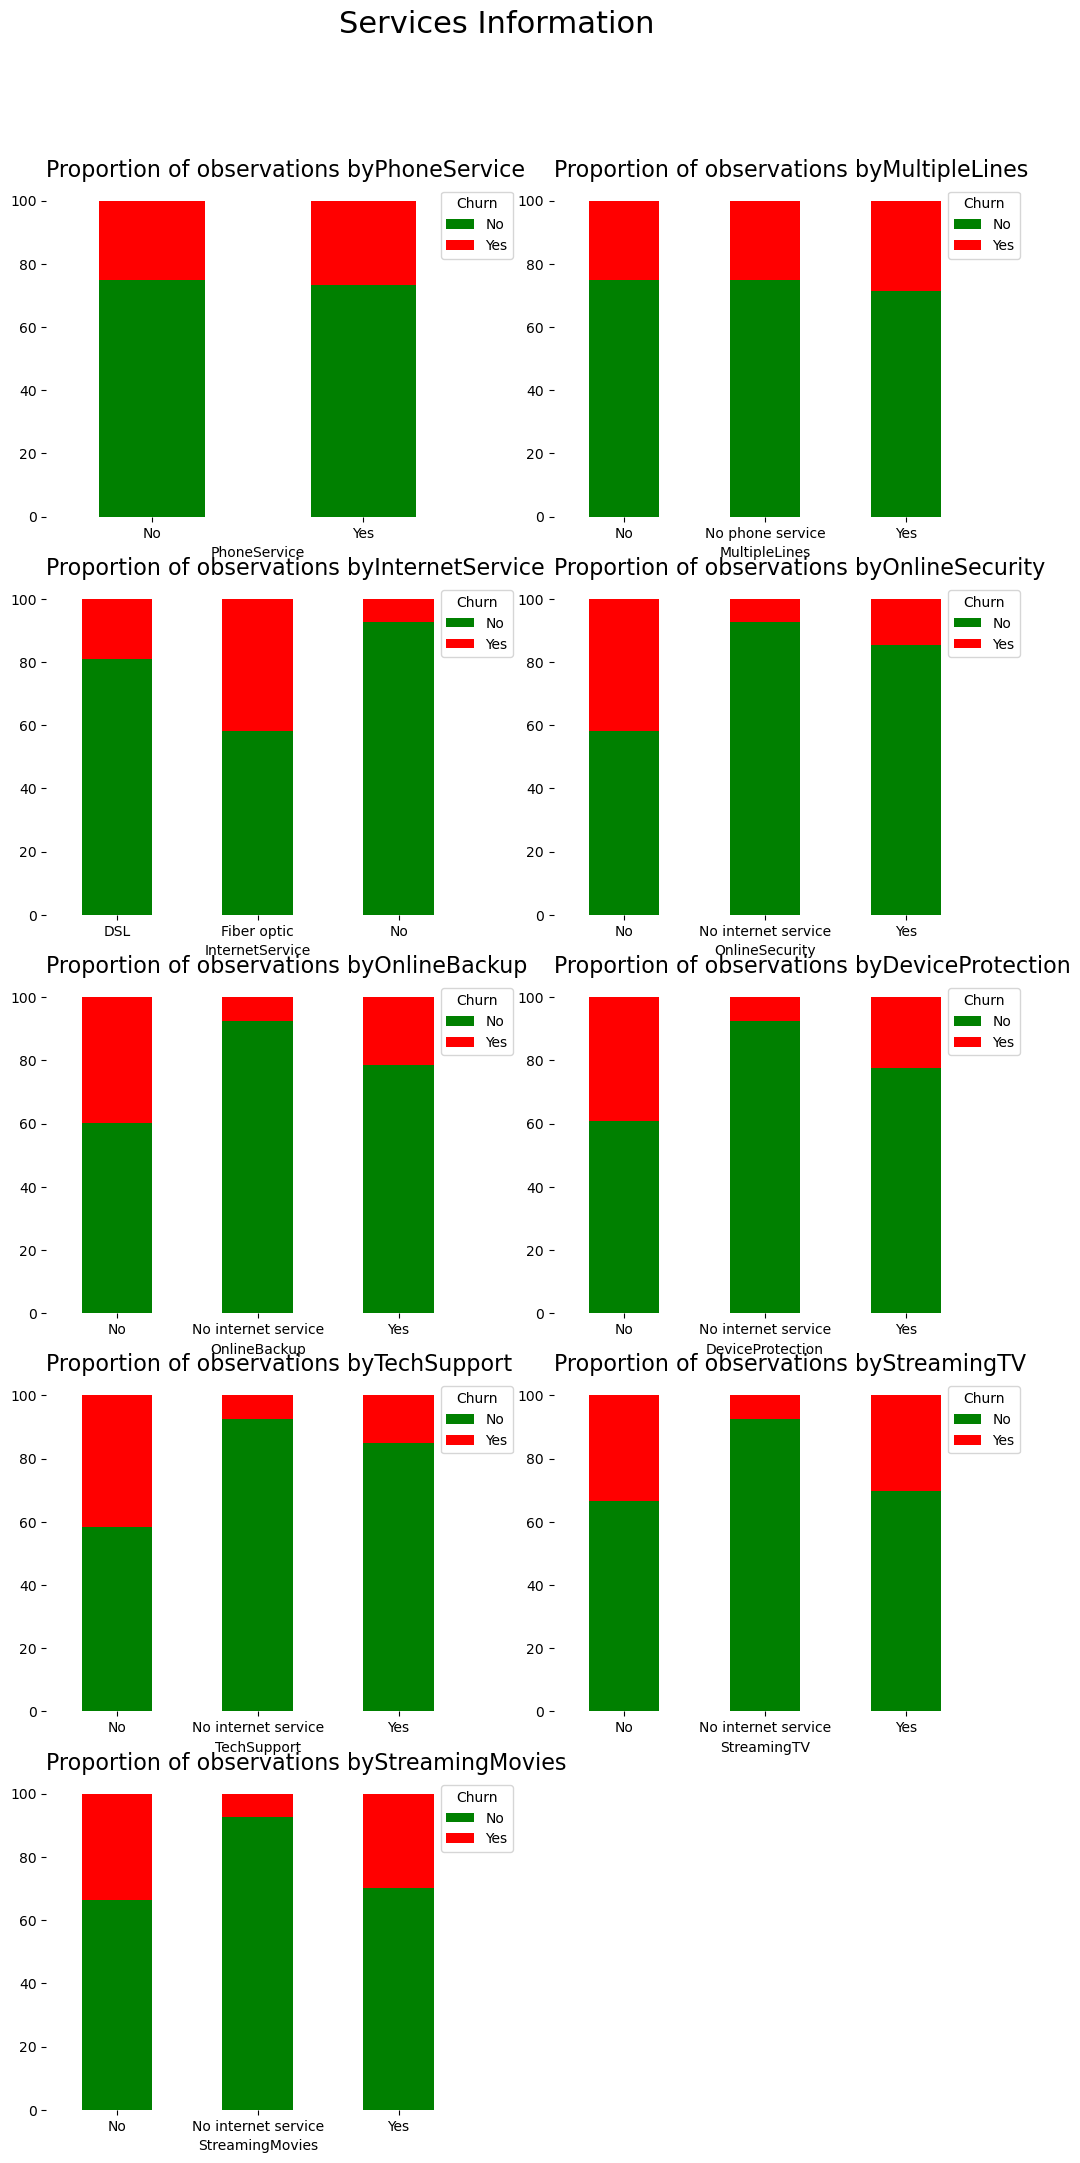

In [125]:
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

percentage_stacked_plot(services_columns, 'Services Information')

In [126]:
def compute_mutual_information(categorical_val):
    return mutual_info_score(categorical_val, df_telco.Churn)

categorical_variables = df_telco.select_dtypes(include=object).drop('Churn', axis=1)
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


In [127]:
df_telco_transformed = df_telco.copy()

label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

for column in label_encoding_columns:
    if column == 'gender':
        df_telco_transformed[column] = df_telco_transformed[column].map({'Female':1,'Male':0})
    else:
        df_telco_transformed[column] = df_telco_transformed[column].map({'Yes':1,'No':0})



In [128]:
df_telco_transformed

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer,42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card,103.20,7362.90,0
7040,1,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [129]:
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

df_telco_transformed = pd.get_dummies(df_telco_transformed, columns=one_hot_encoding_columns)

In [130]:
df_telco_transformed

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,1990.50,0,...,0,0,1,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,1,29.60,346.45,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,74.40,306.60,1,...,1,0,0,1,0,0,0,0,0,1


In [131]:
min_max_cols = ['tenure','MonthlyCharges','TotalCharges']

for col in min_max_cols:
    min_col = df_telco_transformed[col].min()
    max_col = df_telco_transformed[col].max()

    df_telco_transformed[col] =(df_telco_transformed[col]-min_col) / (max_col - min_col)

In [132]:
df_telco_transformed

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,1,0.115423,0.001275,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,0.385075,0.215867,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,1,0.354229,0.010310,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,0.239303,0.210241,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,1,0.521891,0.015330,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,0.662189,0.227521,0,...,0,0,1,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0.845274,0.847461,0,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,1,0.112935,0.037809,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0.558706,0.033210,1,...,1,0,0,1,0,0,0,0,0,1


In [133]:
X = df_telco_transformed.drop(columns='Churn')

y = df_telco_transformed.loc[:,'Churn']

print(X.columns)
print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'Paym

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, shuffle=True)

In [143]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV


In [137]:
def create_models(seed=2):
    models = []
    models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
    models.append(('k_nearest_neighbour',KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines',SVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))

    return models

models = create_models()

In [138]:
results=[]
names=[]
scoring='accuracy'

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    results.append(accuracy)
    names.append(name)

    print(f'Classifier: {name}, Accuracy: {accuracy}')

Classifier: dummy_classifier, Accuracy: 0.7258248009101251


c:\Users\iammo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classifier: k_nearest_neighbour, Accuracy: 0.7650739476678043
Classifier: logistic_regression, Accuracy: 0.8037542662116041
Classifier: support_vector_machines, Accuracy: 0.8077360637087599
Classifier: random_forest, Accuracy: 0.7787258248009101
Classifier: gradient_boosting, Accuracy: 0.8083048919226393


In [140]:
grid_parameters={'n_estimators': [80,90,100,110,115,120],
                 'max_depth': [3,4,5,6],
                 'max_features': [None, 'auto', 'sqrt', 'log2'],
                 'min_samples_split': [2,3,4,5]}

random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)
print(random_search.best_params_)




{'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'log2', 'max_depth': 3}


In [142]:
random_search_predictions = random_search.predict(X_test)

confusion_matrix = confusion_matrix(y_test, random_search_predictions)

confusion_matrix

array([[1163,  113],
       [ 223,  259]], dtype=int64)

In [144]:
print(classification_report(y_test, random_search_predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1276
           1       0.70      0.54      0.61       482

    accuracy                           0.81      1758
   macro avg       0.77      0.72      0.74      1758
weighted avg       0.80      0.81      0.80      1758



In [145]:
accuracy_score(y_test, random_search_predictions)

0.8088737201365188